

# Data Description

Learn computer vision fundamentals with the MNIST dataset

Linnk: https://www.kaggle.com/c/digit-recognizer


The data files `train.csv` and `test.csv` contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783
```

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

```
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

# Download The Data

In [ ]:
# todo

# Loading The data

In [47]:
import numpy as np
import pandas as pd

data_path = "./data/digit-recognizer"

X_train = pd.read_csv(data_path+'/train.csv')
X_test = pd.read_csv(data_path+'/test.csv')

y_train = X_train.pop('label').values
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

In [24]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}") 

X_train: (42000, 28, 28)
y_train: (42000,)
X_test: (28000, 28, 28)


In [3]:
# from tensorflow.keras.datasets import mnist

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# Plot Sample Data

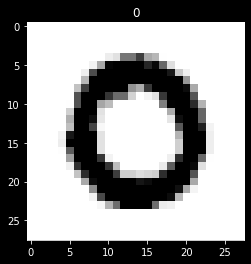

In [25]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

sample_id=1
plt.imshow(X_train[sample_id], cmap='binary')
plt.title(y_train[sample_id]);

# Build DNN Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, min_delta=0.05)

model = Sequential(
    [
        Input(shape=[28, 28]),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)


model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

history = model.fit(
    X_train, y_train, validation_split=0.2, batch_size=512, epochs=20, shuffle=True, callbacks=[early_stopping_callback]
).history

Epoch 1/20
66/66 [==============================] - 1s 9ms/step - loss: 16.3787 - accuracy: 0.8237 - val_loss: 3.0986 - val_accuracy: 0.9231
Epoch 2/20
66/66 [==============================] - 0s 6ms/step - loss: 1.9085 - accuracy: 0.9364 - val_loss: 2.0199 - val_accuracy: 0.9308
Epoch 3/20
66/66 [==============================] - 0s 6ms/step - loss: 0.9645 - accuracy: 0.9543 - val_loss: 1.6502 - val_accuracy: 0.9348
Epoch 4/20
66/66 [==============================] - 0s 6ms/step - loss: 0.5659 - accuracy: 0.9669 - val_loss: 1.3618 - val_accuracy: 0.9449
Epoch 5/20
66/66 [==============================] - 0s 6ms/step - loss: 0.3478 - accuracy: 0.9753 - val_loss: 1.3003 - val_accuracy: 0.9468
Epoch 6/20
66/66 [==============================] - 0s 6ms/step - loss: 0.2258 - accuracy: 0.9806 - val_loss: 1.2929 - val_accuracy: 0.9445
Epoch 7/20
66/66 [==============================] - 0s 6ms/step - loss: 0.1204 - accuracy: 0.9875 - val_loss: 1.2445 - val_accuracy: 0.9492
Epoch 8/20
66/66 [=

## Plot History

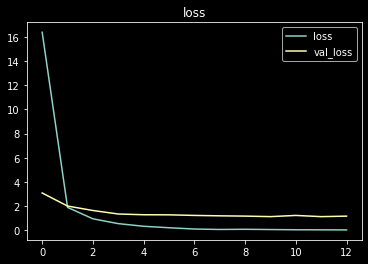

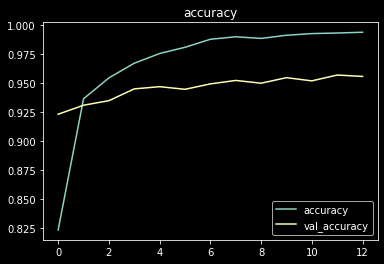

In [27]:
import pandas as pd

history_df = pd.DataFrame(history)

history_df[["loss", "val_loss"]].plot(title='loss')
history_df[["accuracy", "val_accuracy"]].plot(title='accuracy');

## Confusion Matrix

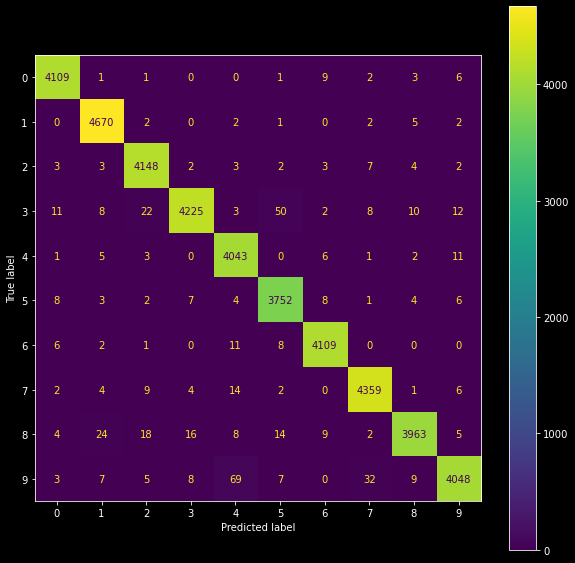

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = model.predict(X_train).argmax(axis=1)

cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred)

cm_disp = ConfusionMatrixDisplay(cm)
_, ax = plt.subplots(figsize=(10,10))
cm_disp.plot(ax=ax)
plt.show()

In [29]:
models_dict = {
    'DNN': model
}

# Build CNN Model

In [88]:
from tensorflow.keras.layers import Dropout
Dropout?

Init signature: Dropout(*args, **kwargs)
Docstring:     
Applies Dropout to the input.

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.
Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
all inputs is unchanged.

Note that the Dropout layer only applies when `training` is set to True
such that no values are dropped during inference. When using `model.fit`,
`training` will be appropriately set to True automatically, and in other
contexts, you can set the kwarg explicitly to True when calling the layer.

(This is in contrast to setting `trainable=False` for a Dropout layer.
`trainable` does not affect the layer's behavior, as Dropout does
not have any variables/weights that can be frozen during training.)

>>> tf.random.set_seed(0)
>>> layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
>>> data = np.arange(10).reshape(5, 2).astype(np.float32)
>>> print(data)
[[0. 1.]
 

In [96]:
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPool2D, Dropout

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=15, min_delta=0.04)

model = Sequential(
    [
        Input(shape=[28, 28, 1]),
        Conv2D(
            filters=32, 
            kernel_size=(3,3), 
            strides=(1,1), 
            padding='same', 
            activation='relu'
        ),
        MaxPool2D(
            pool_size=(2, 2), 
            strides=None,  # (2,2)
            padding='same'
        ),
        Dropout(rate=0.2, seed=7),
        Conv2D(
            filters=16, 
            kernel_size=(3,3), 
            strides=(1,1),
            padding='same', 
            activation='relu'
        ),
        MaxPool2D(
            pool_size=(2, 2), 
            strides=None,  # (2,2)
            padding='same'
        ),
        Dropout(rate=0.15, seed=7),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(64, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
)

history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2, 
    batch_size=512, 
    epochs=50, 
    shuffle=True, 
    callbacks=[early_stopping_callback]
).history

Epoch 1/50
66/66 [==============================] - 3s 30ms/step - loss: 3.4052 - accuracy: 0.4746 - val_loss: 0.6448 - val_accuracy: 0.8106
Epoch 2/50
66/66 [==============================] - 2s 26ms/step - loss: 0.5873 - accuracy: 0.8166 - val_loss: 0.2676 - val_accuracy: 0.9205
Epoch 3/50
66/66 [==============================] - 2s 25ms/step - loss: 0.3270 - accuracy: 0.8990 - val_loss: 0.1669 - val_accuracy: 0.9479
Epoch 4/50
66/66 [==============================] - 2s 26ms/step - loss: 0.2357 - accuracy: 0.9292 - val_loss: 0.1265 - val_accuracy: 0.9606
Epoch 5/50
66/66 [==============================] - 2s 26ms/step - loss: 0.1840 - accuracy: 0.9430 - val_loss: 0.1112 - val_accuracy: 0.9640
Epoch 6/50
66/66 [==============================] - 2s 26ms/step - loss: 0.1506 - accuracy: 0.9529 - val_loss: 0.0915 - val_accuracy: 0.9707
Epoch 7/50
66/66 [==============================] - 2s 26ms/step - loss: 0.1271 - accuracy: 0.9606 - val_loss: 0.0780 - val_accuracy: 0.9751
Epoch 8/50
66

## Plot History

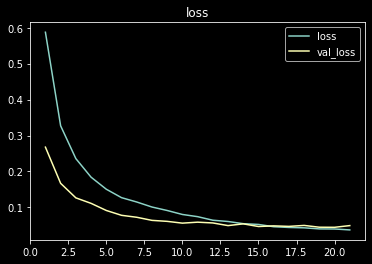

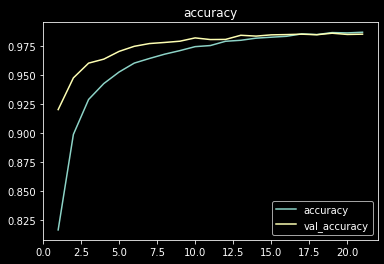

In [98]:
import pandas as pd

history_df = pd.DataFrame(history)

history_df[["loss", "val_loss"]].iloc[1:].plot(title='loss')
history_df[["accuracy", "val_accuracy"]].iloc[1:].plot(title='accuracy');

## Confusion Matrix

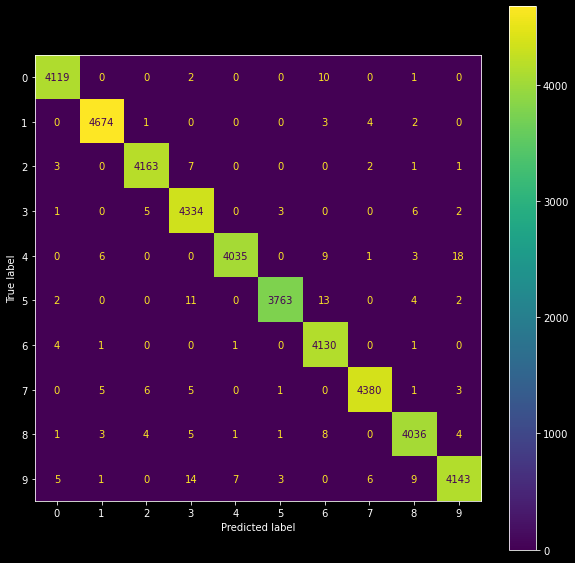

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_train_pred = model.predict(X_train).argmax(axis=1)

cm = confusion_matrix(y_true=y_train, y_pred=y_train_pred)

cm_disp = ConfusionMatrixDisplay(cm)
_, ax = plt.subplots(figsize=(10,10))
cm_disp.plot(ax=ax)
plt.show()

In [100]:
models_dict["CNN"] = model

# Submission Draft

In [101]:
y_pred = models_dict['CNN'].predict(X_test).argmax(axis=1)

submission = pd.DataFrame(
    y_pred, 
    columns=['Label'], 
    index=range(1,len(y_pred)+1)
).reset_index().rename(columns={'index': 'ImageId'})
submission_path = data_path+'/submission.csv'
submission.to_csv(submission_path, index=False)

In [102]:
import os
from dotenv import load_dotenv

load_dotenv()
print(os.environ['KAGGLE_USERNAME'])
os.system(f"kaggle competitions submit -c digit-recognizer -f {submission_path} -m 'sumbission CNN'")

korwinbieniek


0